# Easter 2020 Free-Time Project
## Programming a deep-learning chess engine
### Simon Ilincev

## About

I am working on programming a chess engine that will be able to use machine learning to beat human players. It will try to look ahead using minimax alpha-beta pruning and pick the best choice.

## Table of Contents

1. [Board Evaluation](#Board-Evaluation)
2. [Preparing the Game](#Preparing-the-Game)
3. [Minimax](#Minimax)
4. [Game styles](#Game-styles)
5. [Running the Game](#Running=the-Game)

In [21]:
import chess, chess.svg, random, time, chess.engine, chess.pgn #importing the chess module, the way to print it, and random
from IPython.display import SVG, display, HTML, clear_output
from copy import deepcopy

Setting necessary variables

In [3]:
enders = ["stalemate", "insufficient material", "five-fold repetition", "checkmate on white", "checkmate on black", "can claim draw"]
turn = True
board = chess.Board()

# Board Evaluation

In [4]:
def evaluate():
    if board.is_stalemate() == True: #making sure there is no draw
        return "stalemate"
    elif board.is_insufficient_material() == True:
        return "insufficient material"
    elif board.is_fivefold_repetition() == True:
        return "five-fold repetition"
    elif board.can_claim_draw == True:
        return "can claim draw"
    elif board.is_checkmate() == True:
        if board.turn == True: #if true, it is white's turn and he lost
            return "checkmate on white"
        else:
            return "checkmate on black" #otherwise black's loss
    else:
        return "safe"

In [5]:
enders = ["stalemate", "insufficient material", "five-fold repetition", "checkmate on white", "checkmate on black", "can claim draw"]
turn = True

In [118]:
def calc_eval(bor): #only works for white, as evals board regardless of player's turn
    #unfortunately only works for static positions (doesn't look ahead and give points based on tactical position)
    white_total = (
             len(bor.pieces(chess.PAWN, 1))+
             len(bor.pieces(chess.ROOK, 1))*5+
             len(bor.pieces(chess.KNIGHT, 1))*3+
             len(bor.pieces(chess.BISHOP, 1))*3+
             len(bor.pieces(chess.QUEEN, 1))*9
            )

    if bor.turn == False: #white is false, black is true (sry lol)
        if bor.is_checkmate() == True:
            white_total += 100
        if bor.is_stalemate() == True: #making sure there is no draw
            white_total -= 50
        elif bor.is_insufficient_material() == True:
            white_total -= 50
        elif bor.is_fivefold_repetition() == True:
            white_total -= 50

    black_total = (
             len(bor.pieces(chess.PAWN, 0))*-1+
             len(bor.pieces(chess.ROOK, 0))*-5+
             len(bor.pieces(chess.KNIGHT, 0))*-3+
             len(bor.pieces(chess.BISHOP, 0))*-3+
             len(bor.pieces(chess.QUEEN, 0))*-9
            )

    if bor.turn == True: #white is false, black is true (sry lol)
        if bor.is_checkmate() == True:
            black_total -= 100
        if bor.is_stalemate() == True: #making sure there is no draw
            black_total += 50
        elif bor.is_insufficient_material() == True:
            black_total += 50
        elif bor.is_fivefold_repetition() == True:
            black_total += 50

    if bor.turn == True:
        return white_total+black_total
    else:
        return black_total+white_total

In [111]:
board = chess.Board()
board.push_san('e2e4')
calc_eval(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
None


0

# Preparing the Game

In [7]:
def who():
    color = input("What color would you like to be?\n")
    color = color.lower()
    if color == 'white':
        turn = True
    elif color == 'black':
        turn = False

    return turn, turn

In [8]:
def make_movement():
    movement = input("Make your move, SAN notation please\n")
    board.push_san(movement)
    return movement

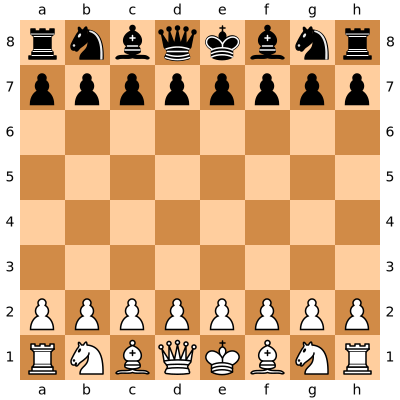

In [126]:
board = chess.Board()
board.push_san('e2e4')
board.pop()
board

# Minimax

In [169]:
pose = 0
def minimax(board, depth, maximizing_player, alpha, beta): #table is board
    global pose
    children = list(board.legal_moves) #find all possible moves from certain position

    if depth == 0 or board.is_game_over(): #don't go deeper if game over/depth ended
        return calc_eval(board), None #calc-eval finds piece-values on board and adds them up. e.g. two pawns would be 2 points

    if maximizing_player == True:
        best_value = -float("Inf")
    else:
        best_value = float("Inf")

    for child in children:
        pose += 1
        board.push(child) #copy board and change it by moving the child move
        new_val = minimax(board, depth - 1, not maximizing_player, alpha, beta)[0] #recursively find value
        board.pop()
        if maximizing_player == True and new_val > best_value:
            best_value = new_val
            best_move = child
            alpha = max(alpha, best_value)
        if maximizing_player == False and new_val < best_value:
            best_value = new_val
            best_move = child
            beta = min(beta, best_value)
        if alpha > beta:
            break

    return best_value, best_move

pgn = open('example.pgn')

fg = chess.pgn.read_game(pgn)
board = fg.board()
for move in fg.mainline_moves():
    board.push(move)

t0 = time.time()
minimax(board, 4, True, -float("Inf"), float("Inf"))
t1 = time.time()
print(pose)
print(t1 - t0)

38464
10.916666030883789


In [223]:
board = chess.Board()
t0 = time.time()
board.push_san('e2e4')
calc_eval(board)
t1 = time.time()
print(1/(t1-t0))

2718.2786779001945


Below, we are trying to prove that our minimax function is indeed analyzing every possible move. After running, we can see that it is (keep in mind that `positions_evaluated` will count the first 20 as well as the second 400, otherwise it would be only 8000 after 3.

In [10]:
def running(): #will need to modify this for pruned decision-tree making -> consult codecademy
    moves = list(board.legal_moves) #just using it rn for putting random bot vs smart bot
    chosen = random.randint(0, len(moves)-1) #form tree here, choose best option -> very simple with sklearn
    board.push_san(board.san(moves[chosen]))
    return moves[chosen]

In [11]:
def display_board():
    return board._repr_svg_()

# Game Styles

In [12]:
def two_humans(pause = 0.1, visual = 'svg'):  #see above
    use_svg = (visual == "svg")
    
    color = 'white'
        
    board_stop = display_board()
    html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, "Nothing Yet", board_stop)
        
    if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
        
    while evaluate() not in enders:
        picked = make_movement()
        board_stop = display_board()
        
        if len(board.move_stack)%2 == 0:
            color = 'white'
        else:
            color = 'black'
        
        html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                       len(board.move_stack), color, picked, board_stop)
        
        if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
    print('Reason for end of game is: ', evaluate())
    return board

In [13]:
def human(pause = 0.1, visual = 'svg'):
    use_svg = (visual == "svg")
    turn, other_turn = who()
    print(turn)
    time.sleep(5)
    if turn == True:
        color = 'white'
    elif turn == False:
        color = 'black'
    
        
    board_stop = display_board()
    html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, "Nothing Yet", board_stop)
        
    if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
        
    while evaluate() not in enders:
        if color == 'black':
            color = 'white'
        else:
            color = 'black'
            
        if other_turn == True:
            picked = make_movement()
            board_stop = display_board()
            other_turn = False
            html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, picked, board_stop)
            
        elif other_turn == False:
            _, picked = minimax(board, 2, board.turn)
            board.push(picked)
            board_stop = display_board()
            other_turn = True
            html = "<center><b>Move %s Player %s, Play '%s':</b><center/><br/>%s" % (
                           len(board.move_stack), color, picked, board_stop)
            
        if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
    print('Reason for end of game is: ', evaluate())
    return board

In [14]:
def two_computers(pause = 0.001, visual = 'svg'):
    use_svg = (visual == "svg")
    
    color = None
            
    while evaluate() not in enders:
        if len(board.move_stack)%2 == 0:
            color = 'white'
        else:
            color = 'black'
            
        if color == 'white':
            _, picked = minimax(board, 2, board.turn)
            board.push(picked)
        else:
            picked = running()
            
        board_stop = display_board()
        html = "<center><b>Move %s Player %s, Plays '%s':</b><center/><br/>%s" % (
                       len(board.move_stack), color, picked, board_stop)
            
        if visual is not None:
            if visual == "svg":
                clear_output(wait=True)
            display(HTML(html))
            if visual == "svg":
                time.sleep(pause)
    print('Reason for end of game is: ', evaluate())
    return board

# Running the Game

In [15]:
def play_game(query, pause = 1, visual = 'svg'):
    use_svg = (visual == "svg")
              
    if query == 'human':
        board = human()
    elif query == 'two computers':
        board = two_computers()
    elif query == 'two humans':
        board = two_humans()

In [16]:
def main():
    choice = input('Available playing options:\n- human\n- two humans\n- two computers\n')
    play_game(choice)

In [17]:
main()

KeyboardInterrupt: 

In [ ]:
def statistics():
    counts = {'White': 0, 'Black': 0, 'Draw': 0}
    for i in range(5):
        main()
        _ = evaluate()
        if _ == 'checkmate on black':
            counts['White'] += 1
        elif _ == 'checkmate on white':
            counts['Black'] += 1
        else:
            counts['Draw'] += 1
        print(board)
    return counts

## To Do

1. Increase depth using alpha-beta pruning to minimize processing power
2. Assign better centi-pawn values based on position of pawns
2. Put human player functions to separate files
3. Attempt ML engine

## Issues

- Smart computer seems to repeat moves
- Smart computer seems unaware king can capture

## Solved 
- Smart computer will **not** take something, even if it is advantageous, if it means the piece will be sacrificed **SOLVED**. Because we are not doing depth-ply but depth-half-move, we need to make sure that the depth is even.
- Increase depth using min-max